# Сравнение методов восстановления параметров зашумленной системы

## Загрузка методов

Были рассмотрены 3 метода:
1. Решения системы напрямую, основываясь на отклике системы на $u$ в виде аппроксимации $\delta$-импульса
2. Решения системы комбинаторным методом, основываясь на отклике системы при гармоническом $u$
3. Решения системы эвристическим подходом, основанным на методе Тихонова, подавая на вход периодический ступенчатый сигнал

In [27]:
%run runner.py

## Установки отрисовки

In [14]:
%pylab inline
import seaborn as sns
sns.set_style('whitegrid')

Populating the interactive namespace from numpy and matplotlib


In [15]:
errors = [norm_error, uniform_error, two_peaks_error]

In [36]:
def method_analyzer(T, delta, error):
    # params : cover_percent, match_percent, r2, stdev, time, h_series, abs(h_real - h_pred)
    delta, *params1 = run_m1(T=T, eps=0.5, delta=delta, err_gen=error)
    delta, *params2 = run_m2(T=T, eps=0.5, delta=delta, err_gen=error)
    depth = int(np.floor(np.log2(T / delta))) - 1
    delta, *params3 = run_m3(T=T, eps=0.5, depth=depth, J=5, err_gen=error)
    # Show coverage and matching
    fig1, ax1 = plt.subplots(figsize=(12,5))
    index = np.arange(2)
    bar_width = 0.25
    opacity = 0.4
    rects1 = ax1.bar(index, params1[:2], bar_width,
                     alpha=opacity,
                     color='b',
                     label='Метод 1')
    rects2 = ax1.bar(index + bar_width, params2[:2], bar_width,
                     alpha=opacity,
                     color='r',
                     label='Метод 2')
    rects3 = ax1.bar(index + 2 * bar_width, params3[:2], bar_width,
                     alpha=opacity,
                     color='g',
                     label='Метод 3')
    ax1.set_xlabel('Статистики')
    ax1.set_ylabel('%')
    ax1.set_title('Статистики покрытия и попадания в доверительные интервалы %s' % (error.__name__))
    ax1.set_xticks(index + 1.5 * bar_width)
    ax1.set_xticklabels(('Покрытие', 'Попадание'))
    ax1.legend(loc=0)
    ax1.grid(False)
    fig1.tight_layout()
    fig2, (ax21, ax22, ax23) = plt.subplots(1, 3, figsize=(12,5))
    ax21.set_title('$R^2$')
    index = np.arange(2)
    bar_width = 0.25
    rects1 = ax21.bar(index, params1[:2], bar_width,
                     alpha=opacity,
                     color='b',
                     label='Метод 1')
    ax1.set_xlabel('Статистики')
    ax1.set_ylabel('%')
    ax1.set_title('Статистики покрытия и попадания в доверительные интервалы %s' % (error.__name__))
    ax1.set_xticks(index + 1.5 * bar_width)
    ax1.set_xticklabels(('Покрытие', 'Попадание'))
    ax22.set_title('Std')
    ax23.set_title('Время работы')
    fig3, ax3 = plt.subplots(figsize=(12,5))
    h_pair1, h_pair2, h_pair3 = params1[-1], params2[-1], params3[-1]
    ax3.set_title('Невязка: abs(h_real - h_central)')
    ax3.plot(h_pair1[0], h_pair1[1], 'r', label='$|\Delta h|_1$')
    ax3.plot(h_pair2[0], h_pair2[1], 'g', label='$|\Delta h|_2$')
    ax3.plot(h_pair3[0], h_pair3[1], 'b', label='$|\Delta h|_3$')
    ax3.legend(loc=0)
    fig3.tight_layout()

## Сравнение

### Параметры для сравнения

### Сравнение при слабом дроблении

Для начала сравним методы в случае слабого дробления, к примеру возьмем $\delta = 2.5$ при $T = 20$.

Method: 1; T: 20.00; Error: norm_error; Eps: 0.50; Delta: 2.50000; Coverage: 87.55%; Match: 86.92%; R2: -0.5876; Std: 1.6566; Avg.time: 0.000096s
Method: 2; T: 20.00; Error: norm_error; Eps: 0.50; Delta: 2.50000; Coverage: 100.00%; Match: 90.25%; R2: -0.4810; Std: 3.3974; Avg.time: 0.151661s
Method: 3; T: 20.00; Error: norm_error; Eps: 0.50; Delta: 2.50000; Coverage: 87.55%; Match: 81.21%; R2: -0.5454; Std: 1.1046; Avg.time: 0.000426s
Method: 1; T: 20.00; Error: uniform_error; Eps: 0.50; Delta: 2.50000; Coverage: 87.55%; Match: 84.12%; R2: -0.5899; Std: 1.6566; Avg.time: 0.000035s
Method: 2; T: 20.00; Error: uniform_error; Eps: 0.50; Delta: 2.50000; Coverage: 100.00%; Match: 89.60%; R2: -0.5598; Std: 3.1054; Avg.time: 0.218258s
Method: 3; T: 20.00; Error: uniform_error; Eps: 0.50; Delta: 2.50000; Coverage: 87.55%; Match: 79.27%; R2: -0.5373; Std: 0.6765; Avg.time: 0.000592s
Method: 1; T: 20.00; Error: two_peaks_error; Eps: 0.50; Delta: 2.50000; Coverage: 87.55%; Match: 84.18%; R2: -0.6

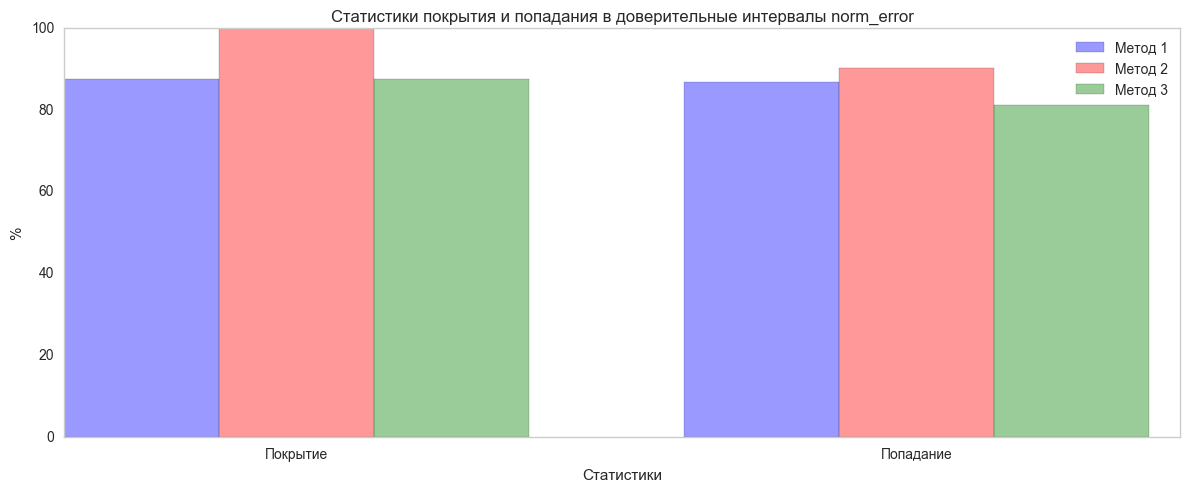

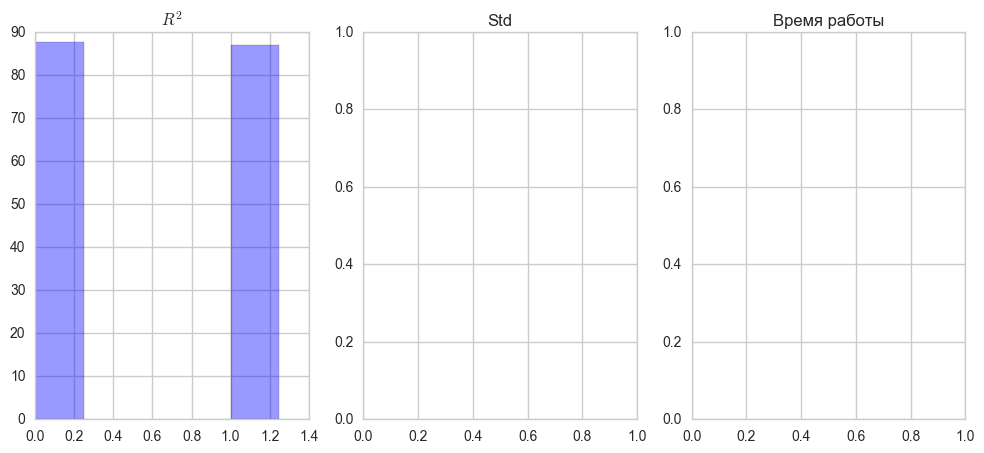

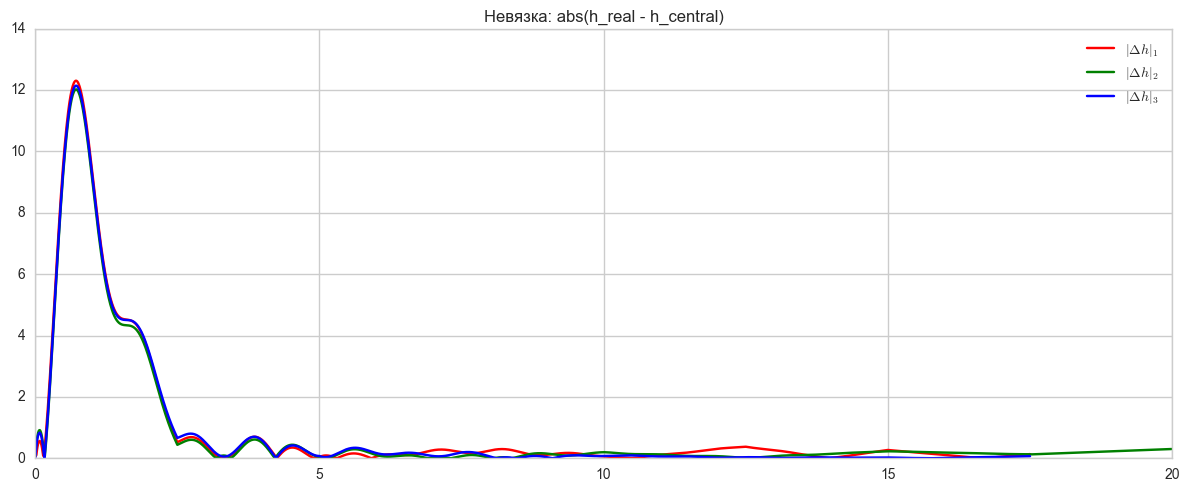

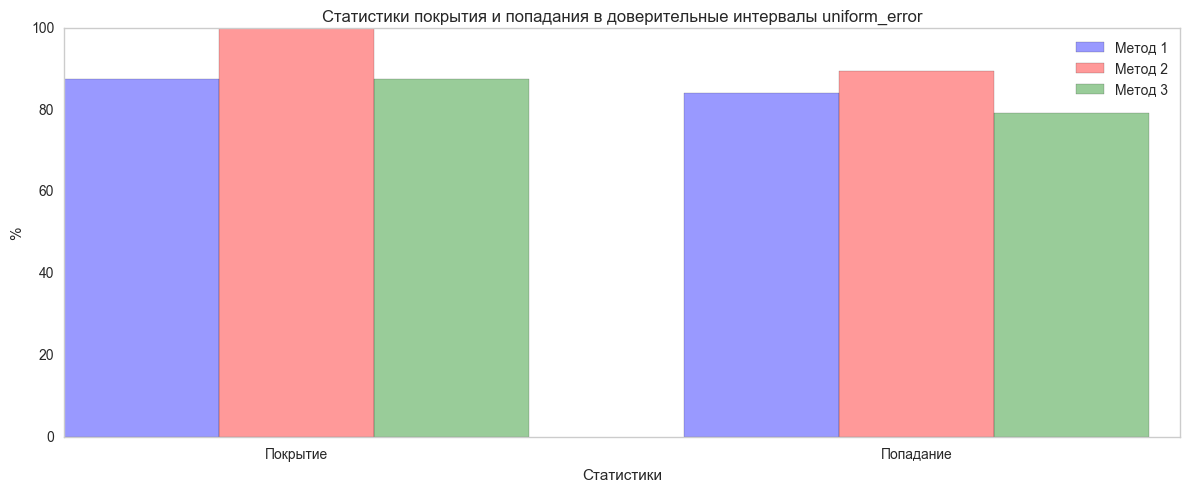

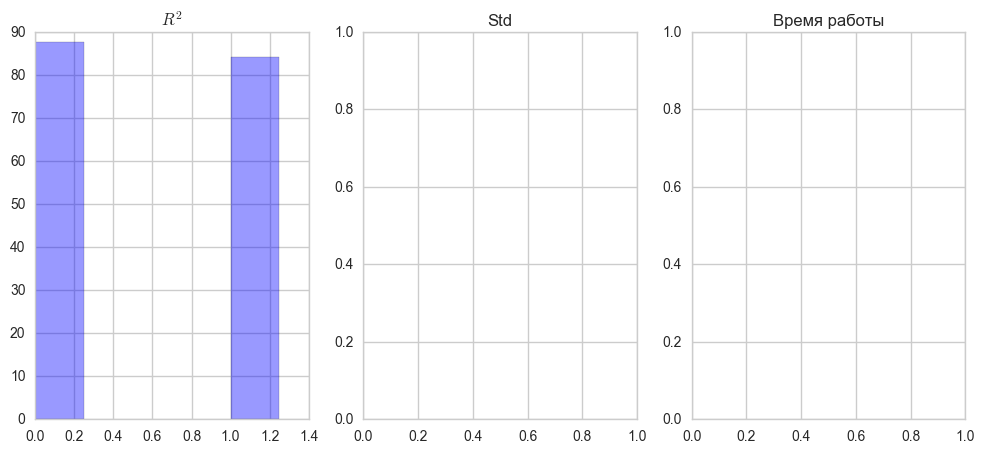

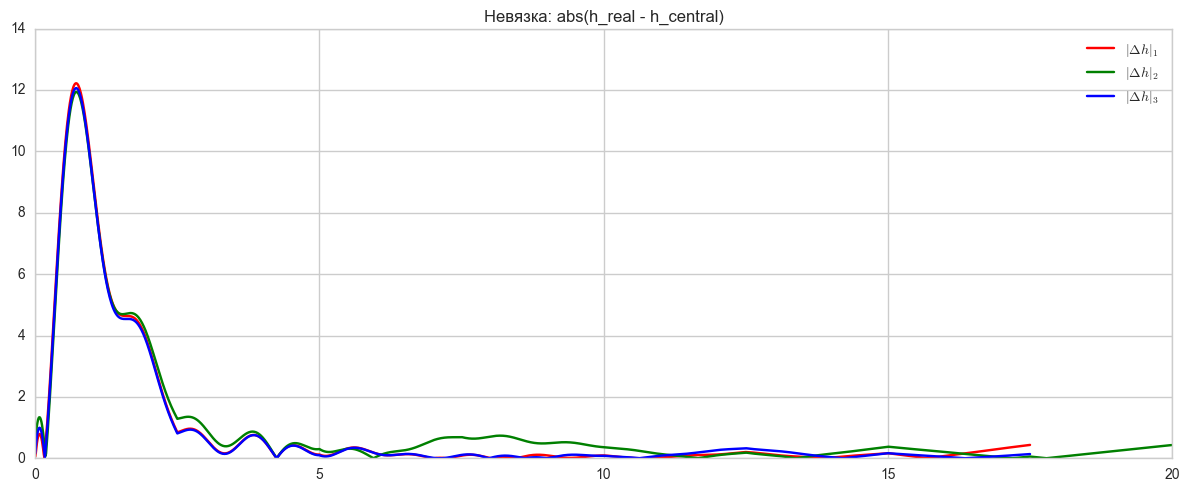

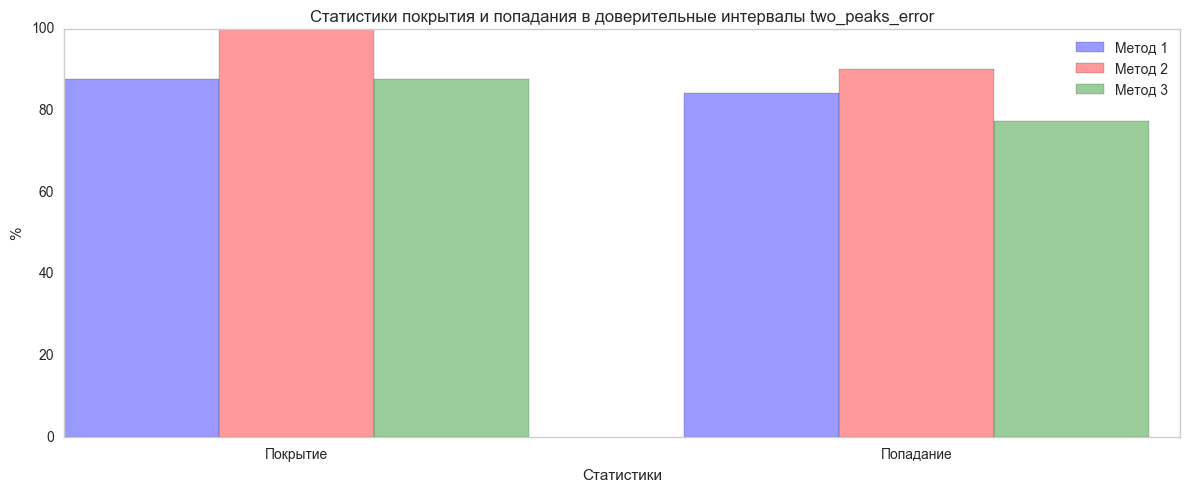

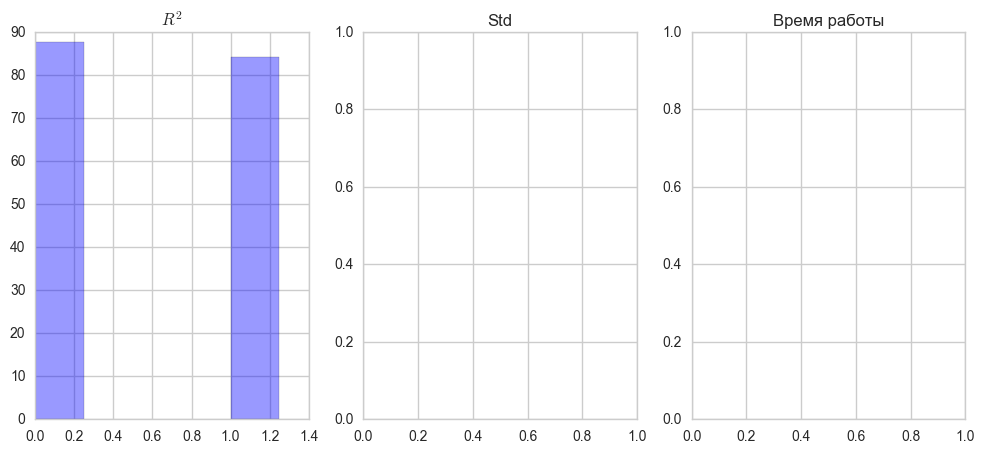

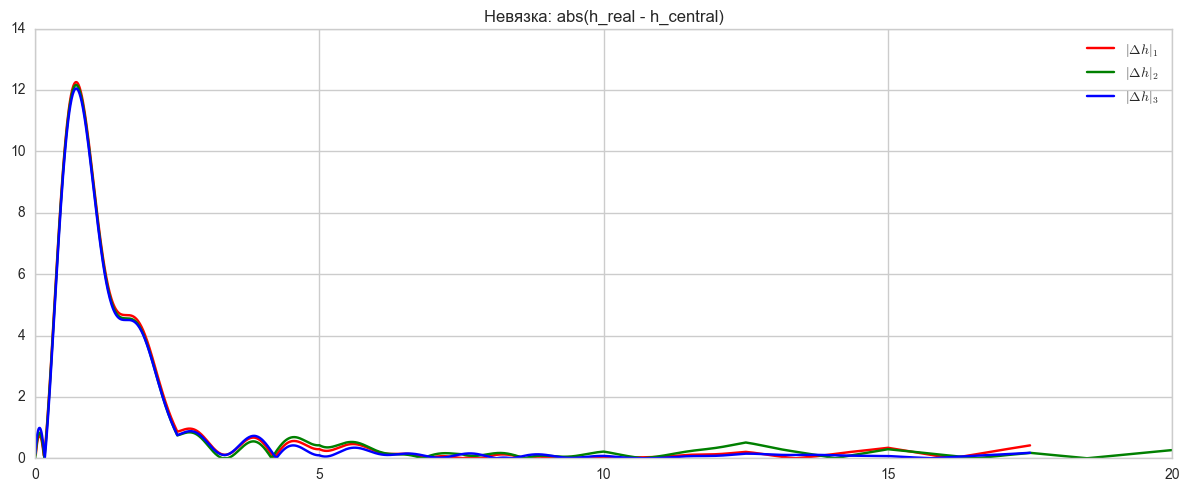

In [37]:
for error in errors:
    method_analyzer(20, 2.5, error)